In [176]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Okt
from konlpy.tag import Mecab
from PIL import Image
from wordcloud import ImageColorGenerator


In [177]:
from wordcloud import WordCloud
from collections import Counter

In [178]:
body = """총 2100만개 중 1900만번째 채굴200만개 남아 2030년 99% 소진4년마다 오는 반감기때 매번 급등다음 시기는 '2024년 2~6월' 예상채굴 난도 올라 가격 상승 전망"업체 채굴량 늘려 장기보유 계획"
< 200만개만 남은 비트코인 > 4일 서울 역삼동에 있는 빗썸 강남센터에서 한 직원이 암호화폐 시세판을 가리키고 있다. 비트코인 가격은 지난 1월 4000만원대 초반에서 최근 5600만원 선까지 반등했다. /김병언 기자전체 비트코인 2100만 개 중 1900만 개의 채굴이 완료된 것으로 집계됐다. 비트코인은 지하자원처럼 채굴할 수 있는 수량이 2100만 개로 정해져 있다. 2030년이면 99%의 비트코인 채굴이 끝나 사실상 신규 공급이 중단될 것으로 전망된다. 올해 저점 대비 40%가량 반등한 비트코인 가격이 공급량 감소에 따라 상승세를 이어나갈 수 있을지 투자자들의 관심이 쏠리고 있다. 90% 캐낸 비트코인…공급량 줄어든다
4일 암호화폐거래소 업비트에 따르면 비트코인 가격은 이날 오후 3시 기준 5651만원으로 올해 저점인 1월 24일(4087만원) 대비 38.37% 상승했다. 지난 한 달간 17%가량 오르다가 최근 며칠 새 5600만원 수준에서 등락을 거듭하고 있다.시장에선 비트코인 가격 향방을 두고 비트코인 채굴량에 주목해야 한다는 의견이 힘을 얻고 있다. 비트코인은 그래픽카드를 개조한 연산기계를 활용해 연산력에 비례해 채굴할 수 있다.
가상자산 전문 미디어 코인텔레그래프에 따르면 가상자산 채굴업체 SBI크립토가 지난 1일 1900만 번째 비트코인 채굴에 성공했다. 이제 채굴할 수 있는 비트코인은 200만 개다. 2030년이 되면 99% 이상의 비트코인 채굴이 완료될 전망이다. 업계에선 2140년에 마지막 비트코인 채굴이 이뤄질 것으로 예상하고 있다.비트코인은 채굴량이 2100만 개에 가까워질수록 채굴 생산성이 떨어지면서 ‘0’에 수렴하는 구조로 이뤄져 있다. 일정한 전력으로 생산할 수 있는 비트코인 수량이 4년마다 절반으로 떨어지기 때문이다. 그동안 이른바 ‘반감기’가 올 때마다 비트코인 가격은 급등했다. 2020년 반감기가 오고 1년간 비트코인 가격은 크게 뛰었고, 2016년에도 반감기에 이른 뒤 1년여간 상승세를 이어갔다. 다음 반감기는 2024년 2~6월이 될 것으로 예상된다.암호화폐거래소 코빗의 리서치센터는 채굴량 지표에 기초한 밸류에이션(가치평가) 기법을 소개하기도 했다. 반감기가 오면서 공급량이 줄어들면 희소성이 커지기 때문에 장기적으로 비트코인 가격이 오를 수밖에 없다는 것이다. 코빗 측은 “금, 은 등을 포함한 귀금속 시장 전문 투자자들 사이에서 오랫동안 귀금속 가치를 평가하는 이론으로 알려졌다”고 설명했다. 정석문 코빗 이사는 이 이론에 대해 “희소성이 분명 자산가치를 결정짓는 중요한 요소인 것은 맞지만 투자심리 등 다른 요인을 반영하지 못한다”며 “비트코인 공급량 감소는 이미 잘 알려진 사실이어서 가격에 선반영됐다고 보는 시각도 적지 않다”고 했다. 채굴업자들은 4년간 상승할 것으로 내다봐채굴 가능한 비트코인이 앞으로 200만 개밖에 남지 않았지만 채굴에 뛰어드는 투자자는 갈수록 늘어나고 있다. 이런 점도 가격 상승을 뒷받침하는 요소로 꼽힌다. 비트코인은 채굴에 참가하는 사람이 늘수록 채굴 난도가 높아지기 때문이다. 암호화폐 투자업체 디에이그라운드의 백훈종 이사는 “채굴업체들은 대부분 장기 투자자로 최근 비트코인 생산 원가 상승에도 이들이 채굴량을 늘린다는 건 4~5년간의 장기적인 상승을 예상한다는 것”이라고 분석했다. 채굴업체들은 대부분 채굴한 암호화폐를 시장에 내다팔지 않고 장기 보유한다.지난해 6월 중국이 비트코인 채굴을 금지하자 채굴 난도가 떨어지면서 비트코인 가격도 4000만원 이하로 내려갔다. 같은 해 9월 비트코인 채굴업체들이 미국으로 대거 이전해 채굴 난도가 중국의 채굴 금지 조치 이전 수준을 회복하자 바로 다음달인 10월에 비트코인 가격은 8000만원을 돌파하기도 했다.하지만 비트코인 공급이 줄어든다고 해서 단기 추세를 예단하기는 어렵다고 전문가들은 입을 모은다. 백 이사는 “4년마다 오는 반감기만으로 비트코인 가격이 지속적으로 상승할 것이라고 예상하기는 힘들다”고 말했다."""
       
       

## 함수화

### 같은 종목들의 기사들의 body들로 이루어진 리스트가 주어지면 하나의 리스트 안에 body들을 싹다 더해주는 함수

In [200]:
def group_by_ticker(body):
    buffer=[]
    for i,v in enumerate(body):
        okt = Okt()
        noun_list = list(okt.nouns(v))
        pos_list = list(okt.pos(v))
        noun_list=[x for x in noun_list if len(x)>1]

        buffer.append(noun_list)
    
    buffer = sum(buffer,[])

    return buffer

### 위의 함수에 전처리 하여 각 종목들의 기사body들로 이루어진 리스트들의 리스트를 넘겨주면 portfolio 내 비중에 비례하여 빈도수 처리하여 워드클라우드 생성

In [ ]:
def plot_wordcloud(bodies,weight,score):
    '''
    각 종목들의 기사 body들과 포트폴리오 가중치를 인수로 받아 
    가중치만큼 반영하여 빈도수에 가중하여 워드클라우드로 출력
    '''


    weight = np.array(weight)*100
    np.rint(weight)
    buffer=[]
    
    for i,v in enumerate(bodies):
        okt = Okt()
        noun_list = list(okt.nouns(v))
        pos_list = list(okt.pos(v))
        noun_list=[x for x in noun_list if len(x)>1]

        noun_list*= int(weight[i])

        buffer.append(noun_list)
        
    buffer = sum(buffer,[]) # 리스트의 리스트를 하나의 리스트로 전환
        

    dancing_mask = np.array(Image.open('psy2.jpg').convert("RGBA"))
    sunny_mask = np.array(Image.open('sunny.jpg').convert("RGBA"))
    sunny_cloudy_mask = np.array(Image.open('sunny_clouds.jpg').convert("RGBA"))
    cloudy_mask = np.array(Image.open('cloud2.png').convert("RGBA"))
    rainy_mask = np.array(Image.open('raindrop.png').convert("RGBA"))

    if score >= 0.9:
        mask = dancing_mask
        
    elif score >= 0.75:
        mask = sunny_mask
        
    elif score >= 0.5:
        mask = sunny_cloudy_mask
        
    elif score >= 0.25:
        mask = cloudy_mask
        
    else :
        mask = rainy_mask
        

    wordcloud = WordCloud(font_path='HANYheadM',mask=mask,width=800, height=800,background_color='white', color_func=ImageColorGenerator(mask))

    count = Counter(buffer)
    wordcloud = wordcloud.generate_from_frequencies(count)
    array = wordcloud.to_array()

    fig = plt.figure(figsize=(10,10))
    plt.imshow(array, interpolation='bilinear')
    plt.show()

    return

In [ ]:
body1 = body
body2 = """마이애미 비트코인 콘퍼런스 행사에 맞춰 동상 공개
마이애미 비트코인 콘퍼런스 행사에서 제막한 비트코인 황소상[로이터 연합뉴스 자료사진. 재판매 및 DB 금지](로스앤젤레스=연합뉴스) 정윤섭 특파원 = 미국 플로리다주 마이애미에 뉴욕 월가의 '돌진하는 황소상'을 본뜬 비트코인 황소상이 세워졌다.    블룸버그통신은 6일(현지시간) 마이애미가 '비트코인 2022 콘퍼런스' 행사를 시작하면서 개막 이벤트로 이 황소상을 세웠다고 보도했다.    '마이애미 불'로 명명된 무게 3천 파운드(1.36t)짜리 이 동상은 레이저 눈을 가진 로봇 황소 모양으로 제작됐다.    레이저 눈은 비트코인 업계에서 가격 상승을 의미하는 뜻으로 사용된다.    뉴욕 월가의 돌진하는 황소상이 상승장을 상징하는 것과 같은 맥락이다.    비트코인 황소상은 플로리다주에 본사를 둔 가상화폐 거래 플랫폼 트레이드스테이션 의뢰로 제작됐다.    프랜시스 수아레스 마이애미 시장은 황소상 제막식에서 "금융의 미래는 마이애미에 있다"고 말했다.    마이애미는 가상화폐 중심 도시를 표방하면서 관련 기업 유치와 블록체인 산업 육성에 적극적으로 나서고 있다.
비트코인 콘퍼런스 행사에 참석한 억만장자 투자자 마이크 노보그라츠[로이터 연합뉴스 자료사진. 재판매 및 DB 금지]비트코인 가격은 황소상 제막과 상관없이 약세를 보이며 4만3천 달러대로 내려왔다.    미국 중앙은행인 연방준비제도(Fed·연준)의 통화 긴축 예고 등으로 기술주 중심의 나스닥 시장이 흔들렸고 비트코인도 동반 하락했다.    가상화폐 정보 사이트 코인데스크에 따르면 미국 서부 시간 기준 낮 12시 현재 비트코인 가격은 24시간 전과 비교해 4.60% 하락한 4만3천811달러를 기록했다.    하지만, 억만장자 가상화폐 투자자인 마이크 노보그라츠 갤럭시디지털 최고경영자(CEO)는 마이애미 비트코인 콘퍼런스에서 연준의 금리 인상 변수가 사라지면 비트코인이 가격이 오를 것이라고 주장했다.    그는 연준이 물가상승 압력 때문에 금리를 인상하겠지만, 향후 경기가 둔화하고 연준이 한발 물러서면 "비트코인은 달에 간다"고 말했다.    '달에 간다'(go to the moon)는 비트코인 급등을 예상할 때 사용하는 말이다.    마이애미 비트코인 콘퍼런스는 9일까지 진행되며 주최 측은 가상화폐 업계 관계자와 투자자 등 2만5천여 명이 참석할 것으로 예상했다.    jamin74@yna.co.kr"""

In [193]:
bodies = [body1,body2]
weight = [0.3,0.7]
score = 0.89

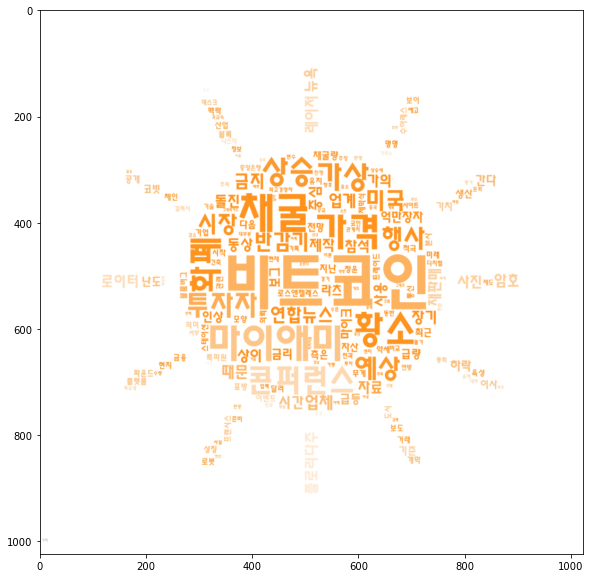

In [194]:
plot_wordcloud(bodies,weight,score)